# Import libraries

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset creation

## Convert a video to frames

In [ ]:
import os

# folder path
dir_path = r'/content/drive/MyDrive/Colab Notebooks/read'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 0


In [ ]:
!ffmpeg -i "/content/drive/MyDrive/Colab Notebooks/me.mp4"  -vf fps=30 "/content/drive/MyDrive/Colab Notebooks/read/inf%04d.png"

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

# Pre-processing

## Read a image

(720, 1280, 3)


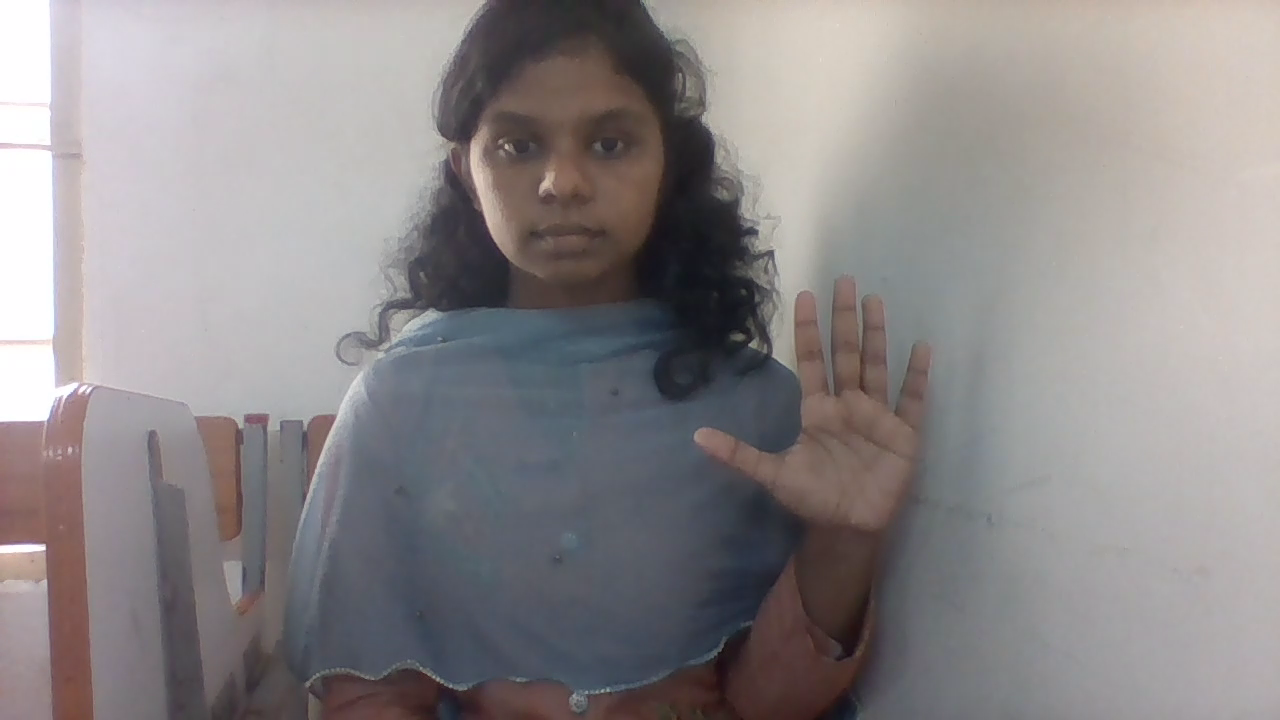

In [ ]:
image_1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/read/inf0147.png")

print(image_1.shape)

cv2_imshow(image_1)

(720, 850, 3)


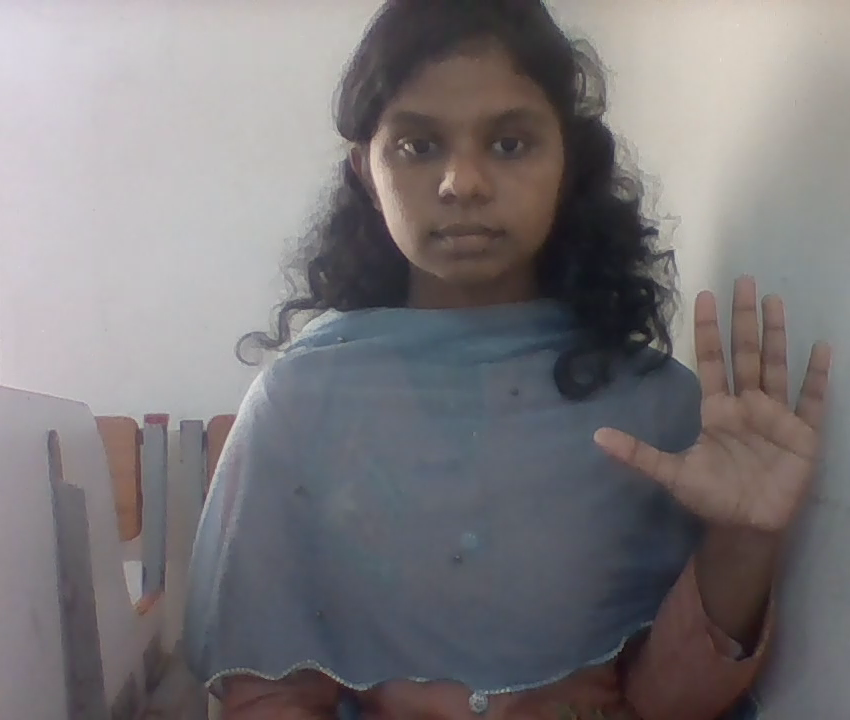

(256, 256, 3)


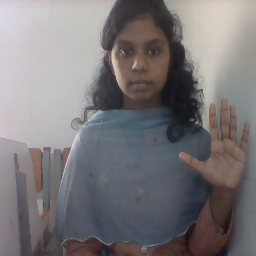

In [ ]:
image_1_crp = image_1[:,100:950] # we are using array indexing to crop an image

print(image_1_crp.shape)

cv2_imshow(image_1_crp)

image_1_resize = cv2.resize(image_1_crp,(256,256))

print(image_1_resize.shape)

cv2_imshow(image_1_resize)

(256, 256)


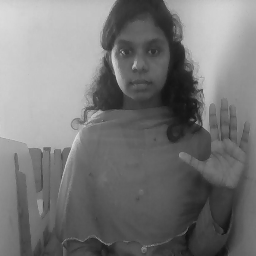

In [ ]:
image_1_b_w = cv2.cvtColor(image_1_resize, cv2.COLOR_BGR2GRAY )

print(image_1_b_w.shape)

cv2_imshow(image_1_b_w)

In [ ]:
from os import listdir

frame_dir = "/content/drive/MyDrive/Colab Notebooks/read"
frame_dir_lst = os.listdir(frame_dir)
frame_dir_lst.sort()
output_dir = "/content/drive/MyDrive/Colab Notebooks/Images_after_cropped"
if not os.path.exists(output_dir):
  os.mkdir(output_dir)

def crop_resize_black_img(img):
  image_1_crp = img[:,300:950]
  image_1_resize = cv2.resize(image_1_crp,(256,256))
  image_1_b_w = cv2.cvtColor(image_1_resize, cv2.COLOR_BGR2GRAY )
  return image_1_b_w

for image_nm in frame_dir_lst:
  img = cv2.imread(os.path.join(frame_dir,image_nm))
  img_after_preprocess = crop_resize_black_img(img)
  cv2.imwrite(os.path.join(output_dir,image_nm),img_after_preprocess)


In [ ]:
dir_path = r'/content/drive/MyDrive/Colab Notebooks/Images_after_cropped'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 1969


In [ ]:
frame_dir = "/content/drive/MyDrive/Colab Notebooks/Images_after_cropped"
frame_dir_lst = os.listdir(frame_dir)
frame_dir_lst.sort()
output_dir = "/content/drive/MyDrive/Colab Notebooks/Images_after_absdiff"

if not os.path.exists(output_dir):
  os.mkdir(output_dir)

def abs_diff(img1,img2):
  absdiff = cv2.absdiff(img1,img2)
  return absdiff

for i in range(0,len(frame_dir_lst)-1):
  curr_img = frame_dir_lst[i]
  next_img = frame_dir_lst[i+1]
  img1 = cv2.imread(os.path.join(frame_dir,curr_img))
  img2 = cv2.imread(os.path.join(frame_dir,next_img))
  absdiff = abs_diff(img1, img2)
  cv2.imwrite(os.path.join(output_dir,curr_img),absdiff)

In [ ]:
dir_path = r'/content/drive/MyDrive/Colab Notebooks/Images_after_absdiff'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 1968


In [ ]:
!zip -r -q Images_after_absdiff.zip Images_after_absdiff


zip error: Nothing to do! (try: zip -r -q Images_after_absdiff.zip . -i Images_after_absdiff)
